## PREDICTING TERM DEPOSIT SUBSCRIPTION IN A PORTUGUESE BANK:INSIGHTS FROM PHONE-BASED MARKETING CAMPAIGNS

#### Submitted by
### Kenwin Dass C (Praxis Business School)

### PROBLEM STATEMENT

### The task is to predict whether a client of a Portuguese bank will subscribe to a term deposit based on phone-based marketing campaigns. The dataset includes demographic information, previous marketing interactions, and behavioral attributes. The goal is to build a model that can accurately classify clients as subscribers or non-subscribers.

#### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import LogisticRegression from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #import Decision tree
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
from sklearn.model_selection import GridSearchCV
# for calculating F-1 score(import Scoring metric)
from sklearn.metrics import f1_score,classification_report 

#### IMPORT A CSV FILE TO DATAFRAME FORMAT

In [2]:
data=pd.read_csv("train.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,32,admin.,single,secondary,no,471,no,yes,cellular,2,apr,243,3,-1,0,unknown,yes
33904,44,management,married,tertiary,no,0,yes,no,cellular,20,aug,141,3,-1,0,unknown,no
33905,42,technician,single,secondary,no,0,yes,no,unknown,6,may,293,1,-1,0,unknown,no
33906,34,technician,married,tertiary,no,116,no,no,cellular,11,aug,145,2,-1,0,unknown,no


In [3]:
## show no. of rows and columns
data.shape

(33908, 17)

In [4]:
## show all columns in dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
## show data type of each variable
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
## finding No of null values in each column
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
## show description of the data in the DataFrame
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.966763,1370.713136,15.803763,257.899227,2.752920,40.168515,0.581987
std,10.613701,3111.689069,8.314558,258.607105,3.068299,99.892114,2.412482
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### EXPLORATORY DATA ANALYSIS 

#### Uni-variate Analysis of Numerical Variable

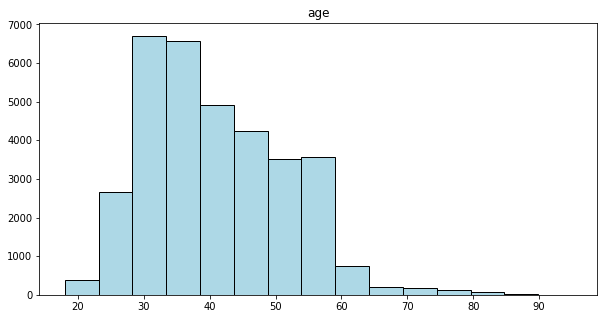

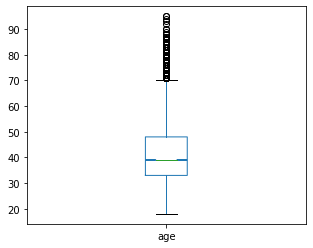

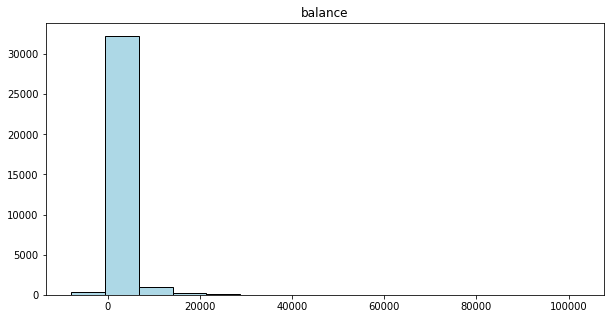

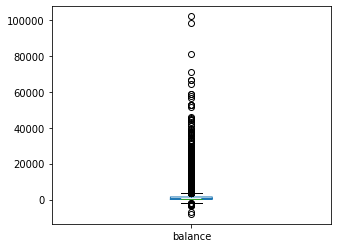

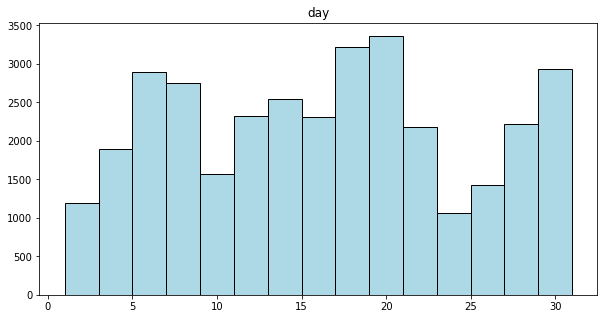

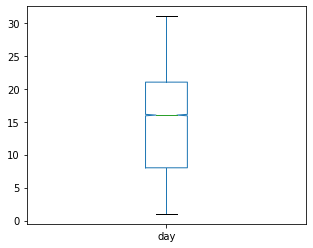

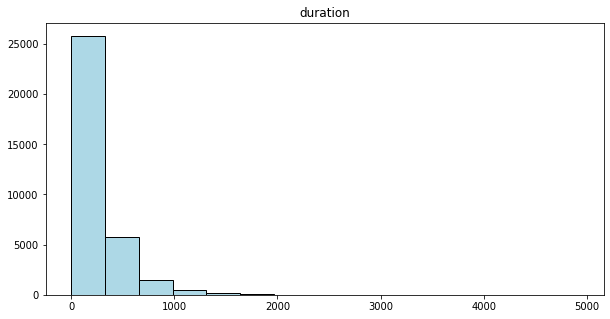

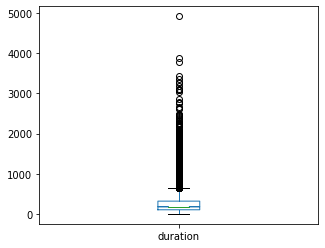

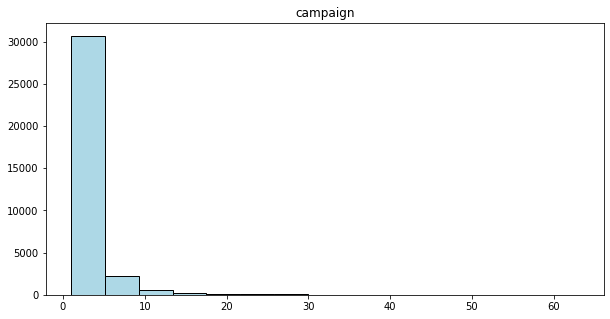

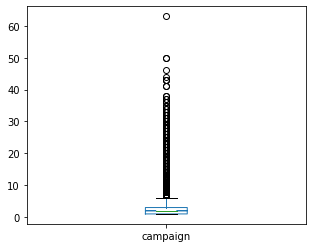

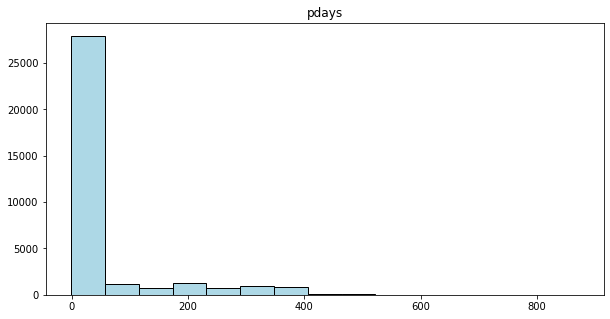

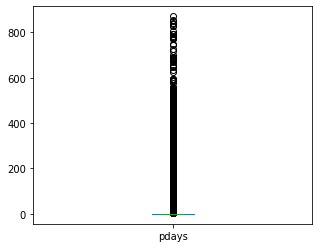

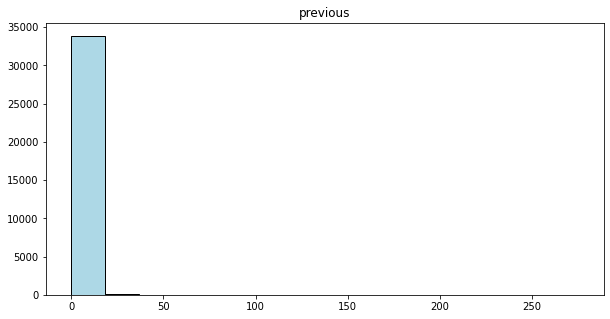

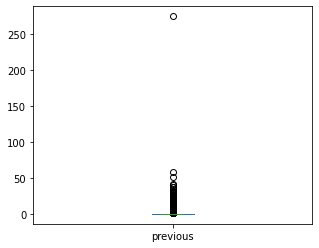

In [8]:
numerical = data.select_dtypes(exclude='object')
for col in numerical.columns:
    #histogram
    numerical.hist(column = col,
              grid=False,        #Do not include the grid
              figsize=(10,5),
             color="lightblue",
             edgecolor="black",
             bins=15)            #(Length,Height) of the plot in inches
    plt.show()
    #boxplot
    numerical.boxplot(column= col,
                grid= False,
                figsize=(5,4),
                notch=True)
    plt.show()

#### Uni-variate Analysis of Categorical Variable

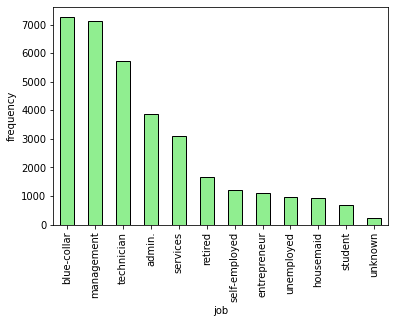

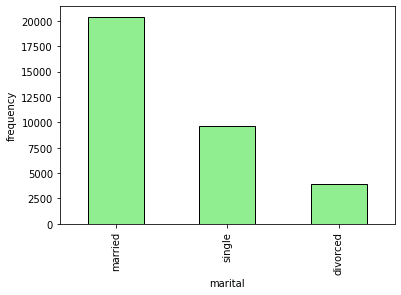

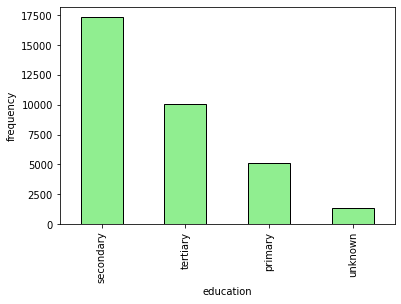

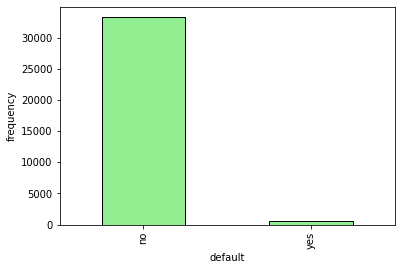

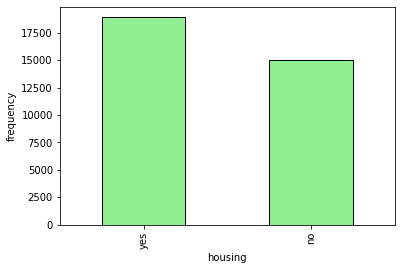

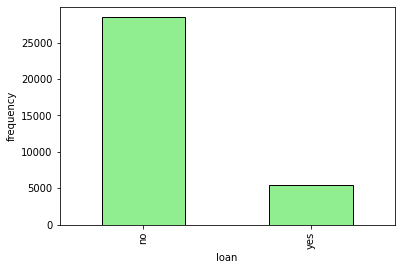

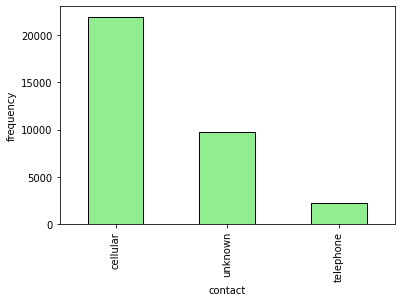

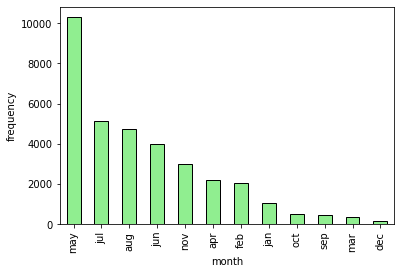

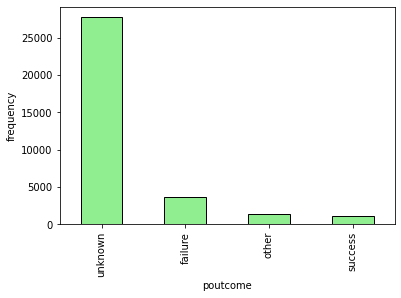

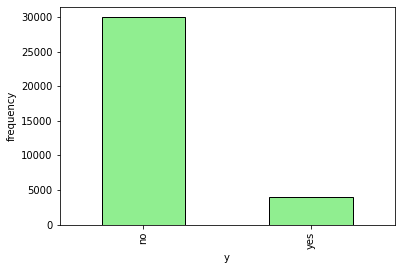

In [9]:
categorical = data.select_dtypes(include='object')
for col in categorical.columns:
    #bar_plot
    data[col].value_counts().plot( kind='bar', xlabel=col, ylabel='frequency', color=['lightGreen'],edgecolor="black",)
    plt.show()

#### Bi-variate Analysis of Numerical Variable

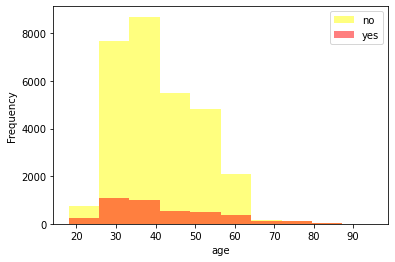

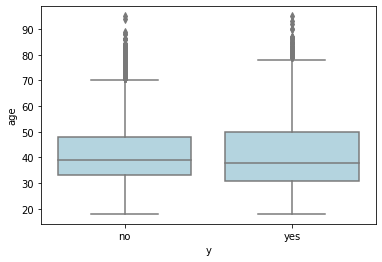

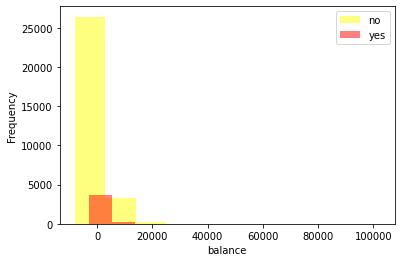

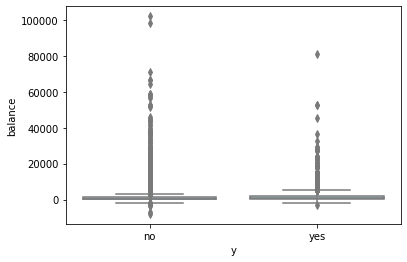

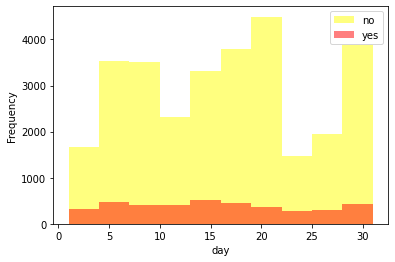

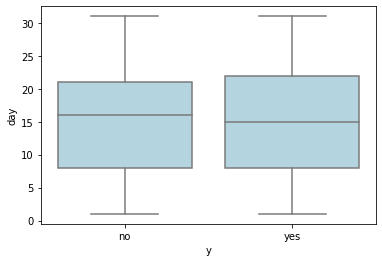

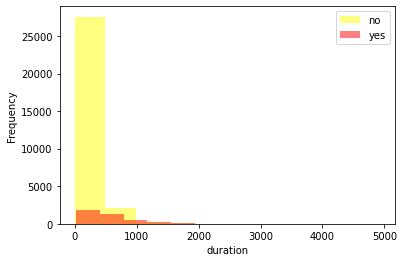

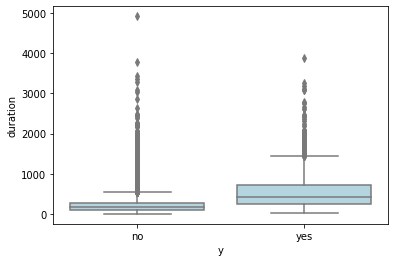

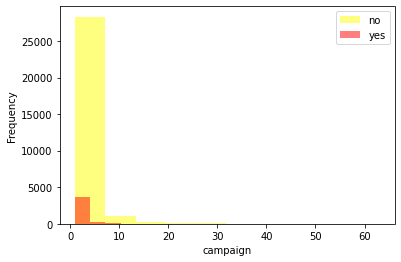

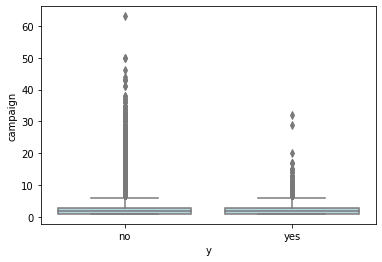

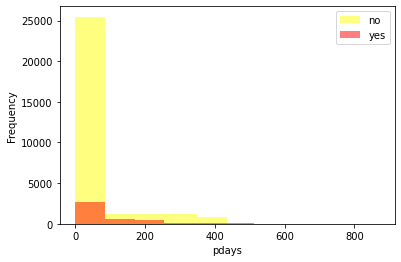

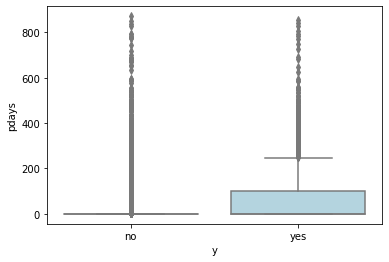

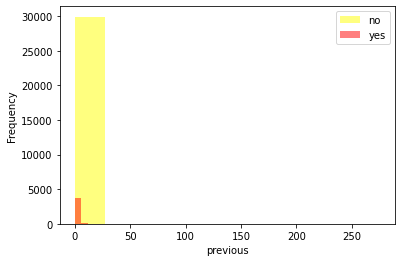

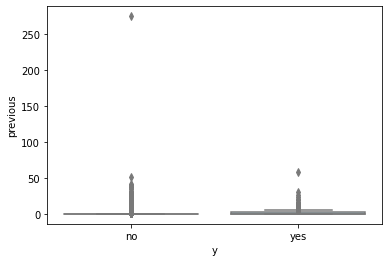

In [10]:
numerical = data.select_dtypes(include='number')
for col in numerical.columns:
    if col != 'y': # exclude target variable
        # plot a histogram
        plt.hist(data.loc[data['y'] == 'no', col], alpha=0.5, label='no', color='yellow')
        plt.hist(data.loc[data['y'] == 'yes', col], alpha=0.5, label='yes', color='red')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        # plot a box plot
        sns.boxplot(x='y', y=col, data=data, color='lightblue')
        plt.show()



#### Bi-variate Analysis of categorical Variable with Target Variable

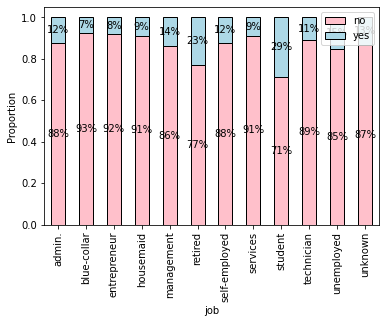

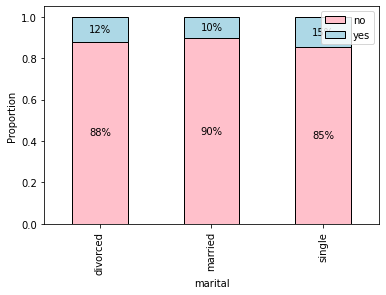

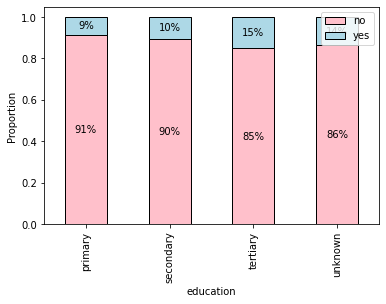

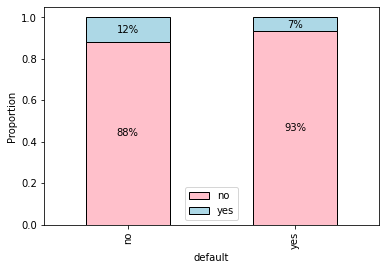

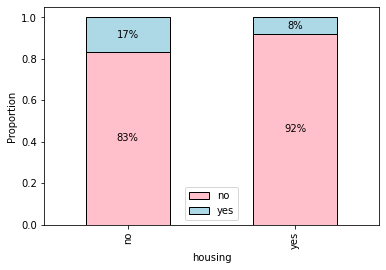

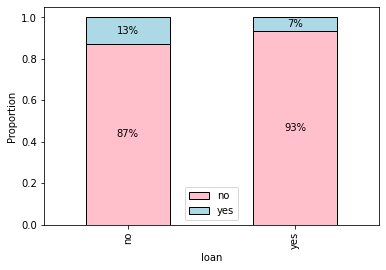

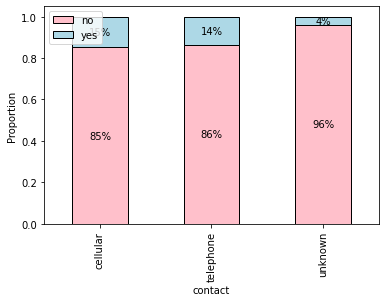

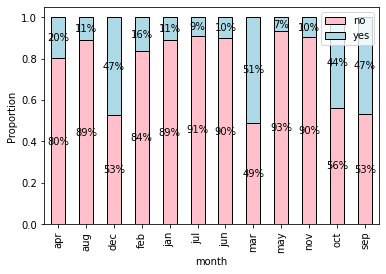

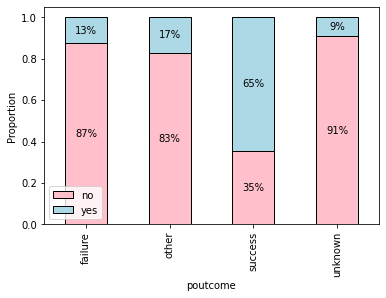

In [11]:
categorical = data.select_dtypes(include='object')
for col in categorical.columns:
    if col != 'y': # exclude target variable
        
        # create a crosstab
        cross_tab = pd.crosstab(data[col], data['y'])
        # calculate proportion
        cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        
        # plot a stacked bar chart with percentage of proportion
        ax = cross_tab_prop.plot(kind='bar', stacked=True, xlabel=col, ylabel='Proportion', 
                                 color=['pink', 'lightblue'], edgecolor="black")
        ax.legend(['no', 'yes'])
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
        plt.show()

#### Multi-variate analysis

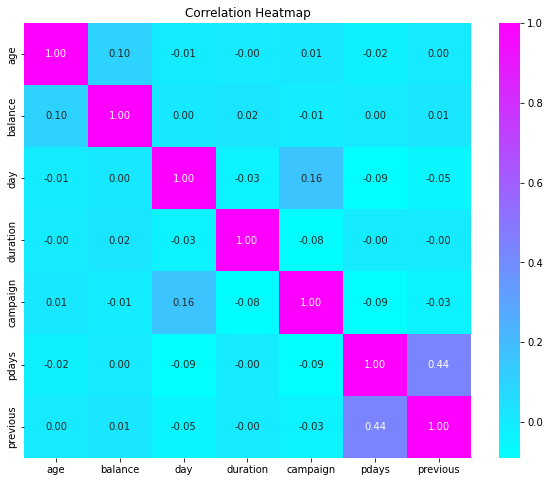

In [12]:
## CORRELATION HEATMAP TO FIND THE RELATION BETWEEN NUMERICAL VARIABLES
# Create a heatmap of the correlations with annotations
plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="cool", annot=True, fmt=".2f")

# Set plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

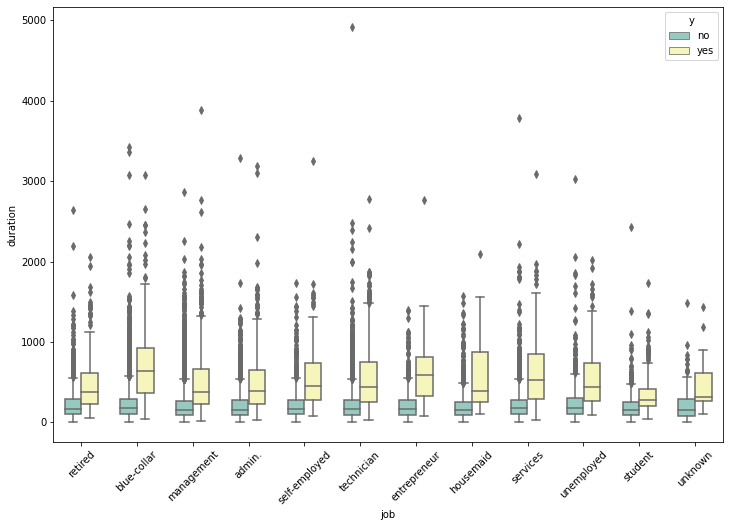

In [13]:
#Side by side box plot to compare distribution
plt.figure(figsize=(12,8))
sns.boxplot(x='job', y='duration', hue='y', data=data, palette='Set3', width=0.6)
plt.xticks(rotation=45)
plt.show()

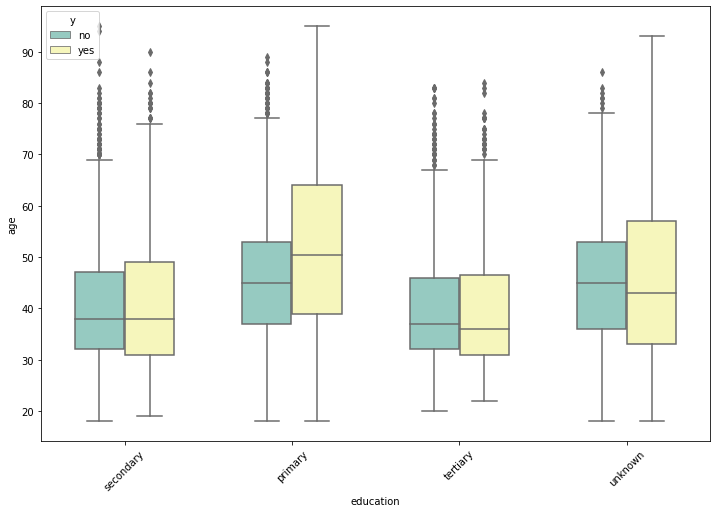

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='education', y='age', hue='y', data=data, palette='Set3', width=0.6)
plt.xticks(rotation=45)
plt.show()

### DATA CLEANING AND PREPROCESSING

#### TARGET - 'Y'

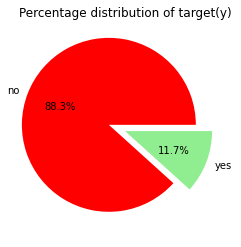

In [15]:
## Visualize the distribution of our target Y using pie chart

## Calculate the value counts of the binary variable
value_counts = data['y'].value_counts()
## Create a list of colors for the pie chart
colors = ['red', 'lightgreen']
## Create a pie chart with percentage labels
plt.pie(value_counts, labels=['no', 'yes'], colors=colors, autopct='%1.1f%%', explode=(0.2, 0))
## Add a title to the pie chart
plt.title('Percentage distribution of target(y)')
## Display the chart
plt.show()

##### From the above pie chart we can say that our target is class imbalanced

In [16]:
# Frequency Distribution of target variable(y)
target_table = pd.crosstab(data["y"],columns="Frequency")
target_table

col_0,Frequency
y,
no,29941
yes,3967


In [17]:
#Label encoding of target variable
data["y"]= data["y"].replace({"no":0,"yes":1})
data["y"].unique()

array([0, 1], dtype=int64)

#### AGE

In [18]:
## Checking for outlier
# calculate z-scores for each row in the 'num_var' column
z_scores = stats.zscore(data['age'])

# find the values of the 'age' column for the outliers
outlier_values = data.loc[(z_scores > 3) | (z_scores < -3), 'age']

# display the outliers of the 'age' column
print("The outliers of the 'age' column are:\n", outlier_values)

The outliers of the 'age' column are:
 47       78
66       83
147      74
402      75
577      75
         ..
33434    83
33622    79
33645    78
33676    75
33857    86
Name: age, Length: 290, dtype: int64


In [19]:
## Checking whether scaling/normalizing the data is required
# find the maximum and minimum values of the 'age' column
max_val = data['age'].max()
min_val = data['age'].min()

# calculate the range of the 'num_var' column
range_val = max_val - min_val
min_val,max_val,range_val

(18, 95, 77)

#### JOB

In [20]:
# Frequency Distribution of job variable(y)
job_table = pd.crosstab(data["job"],columns="Frequency")
job_table

col_0,Frequency
job,
admin.,3860
blue-collar,7250
entrepreneur,1110
housemaid,934
management,7143
retired,1677
self-employed,1210
services,3104
student,699


In [21]:
data['job'].dtypes

dtype('O')

#### MARITAL

In [22]:
# Frequency Distribution of marital variable(y)
marital_table = pd.crosstab(data["marital"],columns="Frequency")
marital_table

col_0,Frequency
marital,
divorced,3908
married,20399
single,9601


#### EDUCATION

In [23]:
# Frequency Distribution of education variable(y)
education_table = pd.crosstab(data["education"],columns="Frequency")
education_table

col_0,Frequency
education,
primary,5098
secondary,17346
tertiary,10079
unknown,1385


#### DEFAULT

In [24]:
# Frequency Distribution of default variable(y)
default_table = pd.crosstab(data["default"],columns="Frequency")
default_table

col_0,Frequency
default,
no,33315
yes,593


#### BALANCE

In [25]:
## Checking whether scaling/normalizing the data is required
# find the maximum and minimum values of the 'balance' column
max_val = data['balance'].max()
min_val = data['balance'].min()

# calculate the range of the 'balance' column
range_val = max_val - min_val
min_val,max_val,range_val

(-8019, 102127, 110146)

#### HOUSING

In [26]:
# Frequency Distribution of housing variable(y)
housing_table = pd.crosstab(data["housing"],columns="Frequency")
housing_table

col_0,Frequency
housing,
no,14992
yes,18916


#### LOAN

In [27]:
# Frequency Distribution of loan variable(y)
loan_table = pd.crosstab(data["y"],columns="Frequency")
loan_table

col_0,Frequency
y,
0,29941
1,3967


#### CONTACT

In [28]:
# Frequency Distribution of contact variable(y)
contact_table = pd.crosstab(data["contact"],columns="Frequency")
contact_table

col_0,Frequency
contact,
cellular,21994
telephone,2164
unknown,9750


#### DAY

In [29]:
## Checking whether scaling/normalizing the data is required
# find the maximum and minimum values of the 'day' column
max_val = data['day'].max()
min_val = data['day'].min()

# calculate the range of the 'day' column
range_val = max_val - min_val
min_val,max_val,range_val

(1, 31, 30)

#### MONTH

In [30]:
# Frequency Distribution of month variable(y)
month_table = pd.crosstab(data["month"],columns="Frequency")
month_table

col_0,Frequency
month,
apr,2198
aug,4727
dec,169
feb,2025
jan,1048
jul,5124
jun,4004
mar,351
may,10308


#### CAMPAIGN

In [31]:
## Checking for outlier
# calculate z-scores for each row in the 'campaign' column
z_scores = stats.zscore(data['campaign'])

# find the values of the 'campaign' column for the outliers
outlier_values = data.loc[(z_scores > 3) | (z_scores < -3), 'campaign']

# display the outliers of the 'campaign' column
print("The outliers of the 'campaign' column are:\n", outlier_values)

The outliers of the 'campaign' column are:
 8        12
28       13
77       13
165      14
215      15
         ..
33761    12
33762    15
33785    16
33832    15
33890    32
Name: campaign, Length: 730, dtype: int64


In [32]:
## Checking whether scaling/normalizing the data is required
# find the maximum and minimum values of the 'campaign' column
max_val = data['campaign'].max()
min_val = data['campaign'].min()

# calculate the range of the 'campaign' column
range_val = max_val - min_val
min_val,max_val,range_val

(1, 63, 62)

#### DURATION

In [33]:
## Checking for outlier
# calculate z-scores for each row in the 'duration' column
z_scores = stats.zscore(data['duration'])

# find the values of the 'duration' column for the outliers
outlier_values = data.loc[(z_scores > 3) | (z_scores < -3), 'duration']

# display the outliers of the 'duration' column
print("The outliers of the 'duration' column are:\n", outlier_values)

The outliers of the 'duration' column are:
 37       1184
134      1548
304      1187
328      1681
372      1343
         ... 
33499    1286
33516    1906
33532    1880
33764    1150
33772    1422
Name: duration, Length: 718, dtype: int64


In [34]:
## Checking whether scaling/normalizing the data is required
# find the maximum and minimum values of the 'duration' column
max_val = data['duration'].max()
min_val = data['duration'].min()

# calculate the range of the 'duration' column
range_val = max_val - min_val
min_val,max_val,range_val

(0, 4918, 4918)

#### PDAYS

In [35]:
## Checking for outlier
# calculate z-scores for each row in the 'pdays' column
z_scores = stats.zscore(data['pdays'])

# find the values of the 'pdays' column for the outliers
outlier_values = data.loc[(z_scores > 3) | (z_scores < -3), 'pdays']

# display the outliers of the 'pdays' column
print("The outliers of the 'pdays' column are:\n", outlier_values)

The outliers of the 'pdays' column are:
 23       344
24       347
36       345
49       359
50       460
        ... 
33824    368
33826    366
33830    360
33854    804
33863    365
Name: pdays, Length: 1318, dtype: int64


In [36]:
## Checking whether scaling/normalizing the data is required
# find the maximum and minimum values of the 'pdays' column
max_val = data['pdays'].max()
min_val = data['pdays'].min()

# calculate the range of the 'num_var' column
range_val = max_val - min_val
min_val,max_val,range_val

(-1, 871, 872)

#### PREVIOUS

In [37]:
## Checking for outlier
# calculate z-scores for each row in the 'previous' column
z_scores = stats.zscore(data['previous'])

# find the values of the 'previous' column for the outliers
outlier_values = data.loc[(z_scores > 3) | (z_scores < -3), 'previous']

# display the outliers of the 'previous' column
print("The outliers of the 'previous' column are:\n", outlier_values)

The outliers of the 'previous' column are:
 24        9
44        9
125      11
242       8
284       9
         ..
33571    14
33782    10
33826    10
33868     9
33884    12
Name: previous, Length: 436, dtype: int64


In [38]:
## Checking whether scaling/normalizing the data is required
# find the maximum and minimum values of the 'previous' column
max_val = data['previous'].max()
min_val = data['previous'].min()

# calculate the range of the 'num_var' column
range_val = max_val - min_val
min_val,max_val,range_val

(0, 275, 275)

In [39]:
# find index of max value in my_column
max_index = data['previous'].idxmax()

# print max value and index
print(f"Max value: {data['previous'][max_index]}, Index: {max_index}")

# drop row with max value from my_column
data = data.drop(max_index, axis=0)

# print the updated dataset
print(data)

Max value: 275, Index: 32107
       age            job   marital  education default  balance housing loan  \
0       58        retired   married  secondary      no      166      no  yes   
1       51    blue-collar   married    primary      no     2995     yes   no   
2       50     management   married   tertiary      no      569      no  yes   
3       27         admin.   married  secondary      no       73     yes   no   
4       38  self-employed  divorced   tertiary      no     6447      no   no   
...    ...            ...       ...        ...     ...      ...     ...  ...   
33903   32         admin.    single  secondary      no      471      no  yes   
33904   44     management   married   tertiary      no        0     yes   no   
33905   42     technician    single  secondary      no        0     yes   no   
33906   34     technician   married   tertiary      no      116      no   no   
33907   60        retired   married    primary      no       60     yes   no   

        co

#### POUTCOME

In [40]:
# Frequency Distribution of poutcome variable(y)
poutcome_table = pd.crosstab(data["poutcome"],columns="Frequency")
poutcome_table

col_0,Frequency
poutcome,
failure,3686
other,1372
success,1139
unknown,27710


## MODEL FITTING

### Taking out Numerical Variables from dataset

In [41]:
numerical_Variables = data.select_dtypes(include=['int', 'float'])#exclude categorical variables
numerical_Variables

,age,balance,day,duration,campaign,pdays,previous,y
0,58,166,3,211,1,-1,0,0
1,51,2995,11,93,2,-1,0,0
2,50,569,18,452,4,-1,0,0
3,27,73,5,140,1,-1,0,0
4,38,6447,12,296,1,-1,0,0
...,...,...,...,...,...,...,...,...
33903,32,471,2,243,3,-1,0,1
33904,44,0,20,141,3,-1,0,0
33905,42,0,6,293,1,-1,0,0
33906,34,116,11,145,2,-1,0,0


### One-Hot Encoding of Categorical Variables

In [42]:
OHE_Categorical_Variables = pd.get_dummies(data[['job','marital','education','default','housing','loan','contact','month','poutcome']],prefix=['job','marital','education','default','housing','loan','contact','month','poutcome'])
OHE_Categorical_Variables 

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33904,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33905,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
33906,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
#combing the one hot encoded categorical variable to rest of the predictors
join= [numerical_Variables,OHE_Categorical_Variables] 
Data = pd.concat(join,axis=1,join='inner')  
Data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

### Assigning X as predictors and y as target

In [44]:
X = Data.drop(["y"],axis=1)  #predictors
y = Data["y"] #target

### Train-Test Split

In [45]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  # X-predictors, y-target

### MODEL 1: Logistic Regression- using all variables on class imbalanced data

In [46]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#predictions on test data
pred_test = lr.predict(X_test)   
pred_test

#Metrics
F1_score = f1_score(y_test, pred_test)

lm1 = pd.DataFrame({'Logistic_Regression': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test,pred_test))
lm1

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7508
           1       0.64      0.23      0.34       969

    accuracy                           0.90      8477
   macro avg       0.77      0.61      0.64      8477
weighted avg       0.88      0.90      0.88      8477



,Logistic_Regression
F1_score,0.340136


### MODEL 2: Decision Tree - using all variables on class imbalanced data

In [47]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

#predictions on test data
pred_test = dt.predict(X_test)   
pred_test

#Metrics
F1_score = f1_score(y_test, pred_test)

dt = pd.DataFrame({'Decision Tree': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test,pred_test))
dt

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7508
           1       0.64      0.36      0.46       969

    accuracy                           0.90      8477
   macro avg       0.78      0.67      0.70      8477
weighted avg       0.89      0.90      0.89      8477



,Decision Tree
F1_score,0.458777


### Using IV for Feature Selection for Binary Logistic Regression

In [48]:
feature = data.drop(["y"],axis=1)  #predictors
target = data["y"] #target

In [49]:
def calc_woe_iv(feature, target):
   # Create a dataframe to store the WOE and IV values for each category/bin
    woe_iv_df = pd.DataFrame(columns=['Category/Bin', 'Event', 'Non-Event', 'WOE', 'IV'])
    # Check the data type of the feature
    if feature.dtypes == 'object':
        # Categorical feature
        feature.fillna('Missing', inplace=True)
        unique_categories = feature.unique()
        for category in unique_categories:
            event_count = len(target[(feature == category) & (target == 1)])
            non_event_count = len(target[(feature == category) & (target == 0)])
            total_event = len(target[target == 1])
            total_non_event = len(target[target == 0])
            event_rate = event_count / total_event
            non_event_rate = non_event_count / total_non_event
            woe = np.log(event_rate / non_event_rate)
            iv = (event_rate - non_event_rate) * woe
            woe_iv_df = woe_iv_df.append({'Category/Bin': category, 'Event': event_count, 'Non-Event': non_event_count, 'WOE': woe, 'IV': iv}, ignore_index=True)
    else:
        # Numerical feature
        bins = pd.qcut(feature, q=10, duplicates='drop')
        for category in bins.cat.categories:
            event_count = len(target[(bins == category) & (target == 1)])
            non_event_count = len(target[(bins == category) & (target == 0)])
            total_event = len(target[target == 1])
            total_non_event = len(target[target == 0])
            event_rate = event_count / total_event
            non_event_rate = non_event_count / total_non_event
            woe = np.log(event_rate / non_event_rate)
            iv = (event_rate - non_event_rate) * woe
            woe_iv_df = woe_iv_df.append({'Category/Bin': category, 'Event': event_count, 'Non-Event': non_event_count, 'WOE': woe, 'IV': iv}, ignore_index=True)
    # Calculate the total IV for the feature
    total_iv = woe_iv_df['IV'].sum()
    # Return the results
    return feature.name, woe_iv_df, total_iv, len(woe_iv_df)
def calculate_iv_df(data, target):
    iv_df = pd.DataFrame()  # define iv_df as an empty DataFrame
    iv_values = []
    for column in data.columns:
        feature = data[column]
        name, woe_iv, iv, n_bins = calc_woe_iv(feature, target)
        iv_values.append((name, iv, n_bins))
    iv_df = pd.DataFrame(iv_values, columns=['Feature', 'IV', 'Num_Bins'])
    iv_df.sort_values('IV', ascending=False, inplace=True)
    return iv_df

In [50]:
data1=calculate_iv_df(feature,data['y'])
data1

,Feature,IV,Num_Bins
11,duration,1.606652,10
15,poutcome,0.515746,4
10,month,0.428220,12
8,contact,0.305686,3
6,housing,0.177162,2
1,job,0.157939,12
0,age,0.120370,10
14,previous,0.119223,2
5,balance,0.095003,10
12,campaign,0.061305,5


In [51]:
# Assuming your DataFrame is called 'df' and the column you want to filter is called 'column_name'
data1 = data1[data1['IV'] >= 0.02]
data1

,Feature,IV,Num_Bins
11,duration,1.606652,10
15,poutcome,0.515746,4
10,month,0.428220,12
8,contact,0.305686,3
6,housing,0.177162,2
1,job,0.157939,12
0,age,0.120370,10
14,previous,0.119223,2
5,balance,0.095003,10
12,campaign,0.061305,5


In [52]:
x = Data.drop(['y','default_no', 'default_yes', 'pdays'],axis=1)  #predictors
Y = Data["y"] #target

### Train-Test Split

In [53]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, Y, test_size = 0.25)  # X-predictors, y-target

### MODEL 3: Logistic Regression- using selected features on class imbalanced data

In [54]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train1,y_train1)

#predictions on test data
pred_test = lr.predict(X_test1)   
pred_test

#Metrics
F1_score = f1_score(y_test1, pred_test)

lm1 = pd.DataFrame({'Logistic_Regression': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test1,pred_test))
lm1

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7500
           1       0.61      0.23      0.33       977

    accuracy                           0.89      8477
   macro avg       0.76      0.60      0.64      8477
weighted avg       0.87      0.89      0.87      8477



,Logistic_Regression
F1_score,0.331343


### MODEL 4: Decision Tree - using selected features on class imbalanced data

In [55]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train1,y_train1)

#predictions on test data
pred_test = dt.predict(X_test1)   
pred_test

#Metrics
F1_score = f1_score(y_test1, pred_test)

dt = pd.DataFrame({'Decision Tree': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test1,pred_test))
dt

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7500
           1       0.62      0.40      0.48       977

    accuracy                           0.90      8477
   macro avg       0.77      0.68      0.72      8477
weighted avg       0.89      0.90      0.89      8477



,Decision Tree
F1_score,0.484735


### Class-Balancing  using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [57]:
y_train.value_counts() #Class imbalanced data

0    22432
1     2998
Name: y, dtype: int64

In [58]:
y_train = pd.DataFrame(y_train_res)
X_train = pd.DataFrame(X_train_res)

In [59]:
y_train.value_counts() #Oversampling using smote balanced the class

0    22432
1    22432
dtype: int64

### MODEL 5: Logistic Regression- using selected features on class balanced data


In [60]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train1,y_train1)

#predictions on test data
pred_test = lr.predict(X_test1)   
pred_test

#Metrics
F1_score = f1_score(y_test1, pred_test)

lm1 = pd.DataFrame({'Logistic_regression': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test1,pred_test))
lm1

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7500
           1       0.61      0.23      0.33       977

    accuracy                           0.89      8477
   macro avg       0.76      0.60      0.64      8477
weighted avg       0.87      0.89      0.87      8477



,Logistic_regression
F1_score,0.331343


### MODEL 6: Decision Tree - using all features on class balanced data

In [61]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

#predictions on test data
pred_test = dt.predict(X_test)   
pred_test

#Metrics
F1_score = f1_score(y_test, pred_test)

dt = pd.DataFrame({'Decision Tree': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test,pred_test))
dt

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7508
           1       0.45      0.67      0.54       969

    accuracy                           0.87      8477
   macro avg       0.70      0.78      0.73      8477
weighted avg       0.90      0.87      0.88      8477



,Decision Tree
F1_score,0.539001


### MODEL 7: Lightgbm - using all features on class balanced data

In [62]:
# create a LightGBM dataset from the training data
train_data = lgb.Dataset(X_train, label=y_train)

# set some hyperparameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# train the LightGBM model
num_rounds = 100
bst = lgb.train(params, train_data, num_rounds)

# make predictions on the test data
y_pred = bst.predict(X_test)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# evaluate the model's performance using F1 score
F1_score = f1_score(y_test, y_pred_binary)

# print the F1 score
print("F1 score:", F1_score)


[LightGBM] [Info] Number of positive: 22432, number of negative: 22432
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 44864, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
F1 score: 0.5874730021598272


In [63]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# create a LightGBM dataset from the training data
train_data = lgb.Dataset(X_train, label=y_train)

# define parameter grid for LightGBM
param_grid = {
    'num_leaves': [10, 31, 50],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [-1, 5, 10],
    'n_estimators': [50, 100, 200],
    'objective': ['binary'],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

# create a LightGBM model
lgb_model = lgb.LGBMClassifier()

# create a GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='f1')

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# create a LightGBM model with the best hyperparameters
lgb_best = lgb.LGBMClassifier(**best_params)

# train the LightGBM model with the best hyperparameters
lgb_best.fit(X_train, y_train)

# make predictions on the test data
y_pred = lgb_best.predict(X_test)
y_pred_prob = lgb_best.predict_proba(X_test)[:,1]
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred_prob]

# evaluate the model's performance using F1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 score:", f1)

Best hyperparameters: {'class_weight': None, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 50, 'objective': 'binary', 'random_state': 42}
F1 score: 0.601496259351621


In [64]:
from sklearn.model_selection import KFold

# set some hyperparameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# set up K-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# create an empty list to store F1 scores for each fold
f1_scores = []

# iterate over each fold
for i, (train_idx, val_idx) in enumerate(kf.split(X)):
    
    # split the data into training and validation sets
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_val_fold, y_val_fold = X.iloc[val_idx], y.iloc[val_idx]
    
    # create LightGBM datasets for training and validation
    train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
    val_data = lgb.Dataset(X_val_fold, label=y_val_fold)
    
    # train the LightGBM model
    num_rounds = 100
    bst = lgb.train(params, train_data, num_rounds, valid_sets=[val_data])
    
    # make predictions on the validation set
    y_pred_val = bst.predict(X_val_fold)
    y_pred_val_binary = [1 if p > 0.5 else 0 for p in y_pred_val]
    
    # calculate the F1 score for this fold and append to list of F1 scores
    f1_fold = f1_score(y_val_fold, y_pred_val_binary)
    f1_scores.append(f1_fold)
    
    # print the F1 score for this fold
    print(f"Fold {i+1} F1 score: {f1_fold}")

# calculate and print the average F1 score across all folds
avg_f1_score = sum(f1_scores) / k_folds
print(f"Average F1 score: {avg_f1_score}")


[LightGBM] [Info] Number of positive: 3139, number of negative: 23986
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 27125, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115724 -> initscore=-2.033566
[LightGBM] [Info] Start training from score -2.033566
[1]	valid_0's binary_logloss: 0.354377
[2]	valid_0's binary_logloss: 0.340498
[3]	valid_0's binary_logloss: 0.329731
[4]	valid_0's binary_logloss: 0.319935
[5]	valid_0's binary_logloss: 0.311256
[6]	valid_0's binary_logloss: 0.303922
[7]	valid_0's binary_logloss: 0.297324
[8]	valid_0's binary_logloss: 0.290933
[9]	valid_0's binary_logloss: 0.285779
[10]	valid_0's binary_logloss: 0.280781
[11]	valid_0's binary_logloss: 0.276466
[12]	vali

[88]	valid_0's binary_logloss: 0.203322
[89]	valid_0's binary_logloss: 0.203186
[90]	valid_0's binary_logloss: 0.203006
[91]	valid_0's binary_logloss: 0.202891
[92]	valid_0's binary_logloss: 0.202749
[93]	valid_0's binary_logloss: 0.202592
[94]	valid_0's binary_logloss: 0.202424
[95]	valid_0's binary_logloss: 0.202334
[96]	valid_0's binary_logloss: 0.202234
[97]	valid_0's binary_logloss: 0.202225
[98]	valid_0's binary_logloss: 0.202208
[99]	valid_0's binary_logloss: 0.202049
[100]	valid_0's binary_logloss: 0.201959
Fold 2 F1 score: 0.5625879043600561
[LightGBM] [Info] Number of positive: 3154, number of negative: 23972
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 27126, number of used features: 51
[LightGBM] [Info]

[98]	valid_0's binary_logloss: 0.191275
[99]	valid_0's binary_logloss: 0.19119
[100]	valid_0's binary_logloss: 0.191178
Fold 4 F1 score: 0.5472868217054264
[LightGBM] [Info] Number of positive: 3213, number of negative: 23913
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 27126, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118447 -> initscore=-2.007217
[LightGBM] [Info] Start training from score -2.007217
[1]	valid_0's binary_logloss: 0.333668
[2]	valid_0's binary_logloss: 0.320651
[3]	valid_0's binary_logloss: 0.310892
[4]	valid_0's binary_logloss: 0.302285
[5]	valid_0's binary_logloss: 0.294646
[6]	valid_0's binary_logloss: 0.287871
[7]	valid_0's binary_logloss: 0.281281
[8]	valid_0

### MODEL 8: Random Forest - using all variables on class balanced data

In [65]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train,y_train) 

#predictions on validation data
pred_test = rf.predict(X_test)   
pred_test


#Metrics
F1_score = f1_score(y_test, pred_test)

rf = pd.DataFrame({'random_forest': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test,pred_test))
rf

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7508
           1       0.61      0.44      0.51       969

    accuracy                           0.90      8477
   macro avg       0.77      0.70      0.73      8477
weighted avg       0.89      0.90      0.90      8477



,random_forest
F1_score,0.514934


### MODEL 9: Adaboost - using all variables on class balanced data

In [66]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train,y_train) 


#predictions on validation data
pred_test = ada_boost.predict(X_test)   
pred_test


#Metrics
F1_score = f1_score(y_test, pred_test)

rf = pd.DataFrame({'ada_boost': [F1_score]}, 
                                index=['F1_score'])

print(classification_report(y_test,pred_test))
rf

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7508
           1       0.56      0.54      0.55       969

    accuracy                           0.90      8477
   macro avg       0.75      0.74      0.75      8477
weighted avg       0.90      0.90      0.90      8477



,ada_boost
F1_score,0.550265


# FROM HERE PIPELINING IS STARTING

In [67]:
pipe=data.copy()


In [68]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
le_y.fit(pipe['y'])
pipe['y'] = le_y.transform(pipe['y'])

In [69]:
dfpipe = pd.get_dummies(pipe, drop_first= True)

In [70]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [71]:
df_iv = dfpipe.copy()
iv = iv_woe(df_iv,"y",bins=10,show_woe=False)[0]

Information value of age is 0.12037
Information value of balance is 0.095003
Information value of day is 0.059459
Information value of duration is 1.606652
Information value of campaign is 0.061305
Information value of pdays is 0.011719
Information value of previous is 0.119223
Information value of job_blue-collar is 0.058385
Information value of job_entrepreneur is 0.005025
Information value of job_housemaid is 0.002169
Information value of job_management is 0.011651
Information value of job_retired is 0.045476
Information value of job_self-employed is 6.9e-05
Information value of job_services is 0.008282
Information value of job_student is 0.039687
Information value of job_technician is 0.001789
Information value of job_unemployed is 0.003389
Information value of job_unknown is 0.000169
Information value of marital_married is 0.031493
Information value of marital_single is 0.03337
Information value of education_secondary is 0.014185
Information value of education_tertiary is 0.042531

In [72]:
#Seggregating the variables based on IV value

preffered=[]
medium=[]
rejected=[]

for i in range(len(iv)):
    if (iv.iloc[i,1])>0.1:
        preffered.append(iv.iloc[i,0])
        
    if  (iv.iloc[i,1])<0.1 and  (iv.iloc[i,1])>0.03:
        medium.append(iv.iloc[i,0])
        
    if (iv.iloc[i,1])<0.03:
        rejected.append(iv.iloc[i,0])    

In [73]:
cat = pipe.select_dtypes(include='object').columns

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

# Define columns for one-hot encoding


# Define preprocessing pipeline with one-hot encoding
preprocessing_pipeline = ColumnTransformer([
    ('onehot', OneHotEncoder(),cat)
], remainder='passthrough')

#now we will select features
index=[]
iv_selected_features = preffered + medium
for col in iv_selected_features:
    index.append(dfpipe.columns.get_loc(col))

cte = ColumnTransformer([('selector',"passthrough", index)], remainder="drop")

#fitting model
lgm=LGBMClassifier(class_weight= 'balanced',learning_rate= 0.1,max_depth= -1, n_estimators= 200, num_leaves=50,objective= 'binary', random_state= 42)
# Define imbalanced classification pipeline with SMOTE and LightGBM
pipeline = imbPipeline([('preprocess', preprocessing_pipeline),('selected features', cte),('smote', SMOTE(random_state=42)),('lgbm',lgm)])


In [75]:
X = pipe.drop('y', axis = 1)
y = pipe['y']
pipeline.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('selected features',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  [0, 3, 6, 25, 28, 36, 41, 42,
                                                   1, 2, 4, 8, 12, 15, 19, 20,
                                                   22, 26, 30, 35, 38, 39])])),
                ('smote', SMOTE(random_state=42)),
                ('lgbm',
                 LGBMClassifier(class_weight='balanced', n_estimators=200,
                                num_leaves=50, objective='binary',
                                random_state=42))])

In [76]:
test = pd.read_csv("test.csv")

In [77]:
y_hat = pipeline.predict(test)

In [78]:
submission = pd.read_csv('submission.csv')

In [79]:
y_hat = pd.DataFrame(y_hat)

In [80]:
submission['pred'] = y_hat

In [81]:
submission.to_csv('praxis-kenwin-submission.csv', index = False)

## RESULT:

#### My LightGBM model using grid search and SMOTE has a better F1 score of 0.60, indicating that it performs well on my data. This was achieved by optimizing the hyperparameters using grid search and balancing the class distribution with SMOTE. 

###### Thank You